In [1]:
# Dependencies for Weather
import requests as req
import openweathermapy.core as owm
from citipy import citipy
#Dependencies for random coordinates
import random
from random import uniform
#Dependencies for Df and Analysis
import numpy as np
import pandas as pd
#Dependencies for Plots
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#Dependencies for api key
from config import api_key

In [2]:
#Define max value for the initial range and sample size
max_coord = 1500
sample = 500

In [3]:
#Generate random latitude coordinates with a function
def lat_coordinates():
    return random.uniform(-90,90)
random_lat_coord = [lat_coordinates() for latitude in range(max_coord)]
#random_lat_coord[0]
#Generate random longitude coordinates with a function
def long_coordinates():
    return random.uniform(-180,180)
random_long_coord = [long_coordinates() for longitude in range(max_coord)]
#random_long_coord[0]
#len(random_long_coord)
#len(random_lat_coord)

In [4]:
# Functions to remove duplicated elements.I decided not to use this here because of future merging problems in the DF
#test the function random_lat_coord = [2,2,3,4,4,8]
#def Remove(_):
    #latitude_coord = []
    #for coordenate in random_lat_coord:
        #if coordenate not in latitude_coord:
            #latitude_coord.append(coordenate)
    #return latitude_coord
#latitude = Remove(random_lat_coord)
#latitude

#def Remove(_):
    #longitude_coord = []
    #for coordenate in random_long_coord:
        #if coordenate not in longitude_coord:
            #longitude_coord.append(coordenate)
    #return longitude_coord
#longitude = Remove(random_lat_coord)
#longitude

In [8]:
#Rename the coordenates list 
latitude = random_lat_coord
longitude = random_long_coord

In [9]:
#Test the function to return city and country
#city= citipy.nearest_city(latitude[0],longitude[0])
#city
#city.city_name
#city.country_code

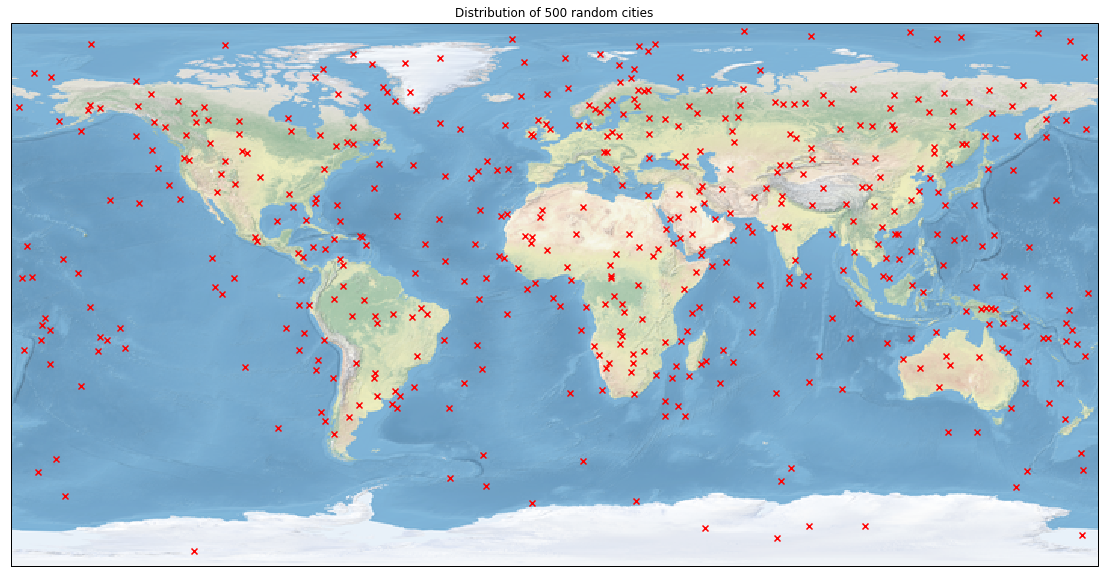

In [10]:
#Generate city names for the lat and long coordenates above
city_names = []
for x in range(0,max_coord):
    city_name = citipy.nearest_city(latitude[x],longitude[x])
    city_names.append(city_name)
#city_names

#Generate the city and country lists 
city_list = []
for x in range(0,max_coord):
    city = city_names[x].city_name
    #print(city_names[x].city_name)
    city_list.append(city)

country_list = []
for y in range(0,max_coord):
    country = city_names[y].country_code
    #print(city_names[y].country_code)
    country_list.append(country)

#Generate Dataframe
location_df = pd.DataFrame()

location_df["Latitude"] = ""
location_df["Longitude"] = ""
location_df['City'] = ''
location_df['Country Code'] = ''
location_df = location_df.append(pd.DataFrame.from_dict({"Latitude":latitude,"Longitude":longitude,"City":city_list,"Country Code":country_list,}))
location_df = location_df.reset_index(drop=True)
location_df.shape
#location_df

#Clean the data, drop the duplicated citites and reindex
drop_location_df = location_df.drop_duplicates(['City'])
drop_location_df.shape
new_location_df = drop_location_df.sample(sample)
city_coordinates_df = new_location_df.reset_index(drop=True)

#See the random coordenates in the map for the nearest cities:
import cartopy.crs as ccrs

fig, ax = plt.subplots(figsize = (20,10))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

plt.scatter(list(city_coordinates_df['Longitude']),list(city_coordinates_df['Latitude']), color='red', marker = 'x', transform = ccrs.Geodetic(),)

plt.title('Distribution of 500 random cities')
plt.savefig('50 Cities in the world')
plt.show()

In [16]:
#Set the URL
url = "http://api.openweathermap.org/data/2.5/weather?"

#Set the parameters
units = 'imperial'
settings = {"units":"imperial", "appid" :api_key}

In [17]:
# Testing the api_key -> Get current weather for first city in the initial city list
try:
    current_weather = owm.get_current(city_list[0], **settings)
    print("Current temperature (F) for %s:" %(city_list[0]).capitalize())
    print(current_weather['main']['temp'])
except:
    print('HTTP Error: Not Found')

Current temperature (F) for Tiksi:
-21.92


In [18]:
#city_coordinates_df.head()

In [19]:
#Requesting weather data for all the cities in the list. I should iterate through all the list
for index, row in city_coordinates_df.iterrows():    
    
    #Set parameters for the query
    city = row['City']
    country = row['Country Code']
    settings['q'] =f"{city},{country}"
    
    #Query the url
    #query_url = "%s%sappid=%s&units=%s&q="%(url,api_key,units,city)
    query_url = f"{url}appid={api_key}&units={units}&q="
    
    # Request information to the endpoint and prit response
    print(f"Retrieve Weather Parameters for: {settings['q']}")
    WeatherPy_response = req.get(query_url + city)
    print(WeatherPy_response.url)
    
    #Create json response
    WeatherPy_response  = WeatherPy_response.json()
    
    #Set values for Temperature, Humidity, Cloudiness, Wind Speed, Latitude and Longitude
    city_coordinates_df.set_value(index,"Temperature",WeatherPy_response.get("main",{}).get("temp_max"))
    city_coordinates_df.set_value(index,"Humidity",WeatherPy_response.get("main",{}).get("humidity"))
    city_coordinates_df.set_value(index,"Cloudiness",WeatherPy_response.get("clouds",{}).get("all"))
    city_coordinates_df.set_value(index,"Wind Speed",WeatherPy_response.get("wind",{}).get("speed"))
    city_coordinates_df.set_value(index,"Latitude",WeatherPy_response.get("coord",{}).get("lat"))
    city_coordinates_df.set_value(index,"Longitude",WeatherPy_response.get("coord",{}).get("lon"))
    

Retrieve Weather Parameters for: saint-philippe,re
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=saint-philippe
Retrieve Weather Parameters for: inuvik,ca
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=inuvik
Retrieve Weather Parameters for: kudahuvadhoo,mv
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=kudahuvadhoo
Retrieve Weather Parameters for: gizo,sb
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=gizo
Retrieve Weather Parameters for: kalundborg,dk
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=kalundborg
Retrieve Weather Parameters for: mount isa,au
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=mount%20isa
Retrieve Weather Parameters for: hof,no
ht

http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=kovdor
Retrieve Weather Parameters for: pisco,pe
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=pisco
Retrieve Weather Parameters for: cam ranh,vn
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=cam%20ranh
Retrieve Weather Parameters for: barawe,so
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=barawe
Retrieve Weather Parameters for: pevek,ru
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=pevek
Retrieve Weather Parameters for: okhotsk,ru
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=okhotsk
Retrieve Weather Parameters for: amga,ru
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52

http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=coahuayana
Retrieve Weather Parameters for: san patricio,mx
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=san%20patricio
Retrieve Weather Parameters for: hilo,us
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=hilo
Retrieve Weather Parameters for: chuy,uy
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=chuy
Retrieve Weather Parameters for: taltal,cl
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=taltal
Retrieve Weather Parameters for: formiga,br
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=formiga
Retrieve Weather Parameters for: tiarei,pf
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeff

http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=mandalgovi
Retrieve Weather Parameters for: adeje,es
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=adeje
Retrieve Weather Parameters for: lakatoro,vu
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=lakatoro
Retrieve Weather Parameters for: taoudenni,ml
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=taoudenni
Retrieve Weather Parameters for: hendijan,ir
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=hendijan
Retrieve Weather Parameters for: bethel,us
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=bethel
Retrieve Weather Parameters for: angra,pt
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719a

http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=dinsor
Retrieve Weather Parameters for: daru,pg
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=daru
Retrieve Weather Parameters for: minab,ir
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=minab
Retrieve Weather Parameters for: ormara,pk
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=ormara
Retrieve Weather Parameters for: grand baie,mu
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=grand%20baie
Retrieve Weather Parameters for: santiago,pe
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=santiago
Retrieve Weather Parameters for: elesbao veloso,br
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719

http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=moiyabana
Retrieve Weather Parameters for: georgiyevka,kz
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=georgiyevka
Retrieve Weather Parameters for: puerto leguizamo,co
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=puerto%20leguizamo
Retrieve Weather Parameters for: hambantota,lk
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=hambantota
Retrieve Weather Parameters for: leningradskiy,ru
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=leningradskiy
Retrieve Weather Parameters for: husavik,is
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=husavik
Retrieve Weather Parameters for: vao,nc
http://api.openweathermap.

http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=klaksvik
Retrieve Weather Parameters for: gobabis,na
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=gobabis
Retrieve Weather Parameters for: los llanos de aridane,es
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=los%20llanos%20de%20aridane
Retrieve Weather Parameters for: santa rosa,ar
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=santa%20rosa
Retrieve Weather Parameters for: krechevitsy,ru
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=krechevitsy
Retrieve Weather Parameters for: labuhan,id
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=labuhan
Retrieve Weather Parameters for: lavrentiya,ru
http://api.openw

http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=progreso
Retrieve Weather Parameters for: bilibino,ru
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=bilibino
Retrieve Weather Parameters for: borlange,se
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=borlange
Retrieve Weather Parameters for: sola,vu
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=sola
Retrieve Weather Parameters for: bandarbeyla,so
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=bandarbeyla
Retrieve Weather Parameters for: adrar,dz
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=adrar
Retrieve Weather Parameters for: port-gentil,ga
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df

http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=ossora
Retrieve Weather Parameters for: puerto ayora,ec
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=puerto%20ayora
Retrieve Weather Parameters for: anito,ph
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=anito
Retrieve Weather Parameters for: barentsburg,sj
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=barentsburg
Retrieve Weather Parameters for: umm lajj,sa
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=umm%20lajj
Retrieve Weather Parameters for: yanchukan,ru
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=yanchukan
Retrieve Weather Parameters for: siuna,ni
http://api.openweathermap.org/data/2.5/weather?ap

http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=redmond
Retrieve Weather Parameters for: khorixas,na
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=khorixas
Retrieve Weather Parameters for: kutum,sd
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=kutum
Retrieve Weather Parameters for: dolores,uy
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=dolores
Retrieve Weather Parameters for: kavieng,pg
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=kavieng
Retrieve Weather Parameters for: mocambique,mz
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719aeffa06bf72b52c87d8&units=imperial&q=mocambique
Retrieve Weather Parameters for: mataura,pf
http://api.openweathermap.org/data/2.5/weather?appid=74d08b88df719

In [20]:
#Exception Handling
# What should I do if I can't retrieve information ....Drop na's cities.
city_coordinates_df2 = city_coordinates_df.dropna()

initial_df_sz= city_coordinates_df.shape[0]
final_df_sz= city_coordinates_df2.shape[0]

if initial_df_sz > final_df_sz:
    print("Oops, we couldn't retrieve the weather parameters for (%s) cities" %(initial_df_sz - final_df_sz))
    print("Your new DataFrame has the weather information for (%s) unique cities"%(final_df_sz))
    print('The DataFrame has been saved as WeatherPy2.csv')
    city_coordinates_df2.to_csv("WeatherPy2.csv")
else:
    print("We succesfully retrieve the weather information for all the random cities sample you requested")
    print('The DataFrame has been saved as WeatherPy.csv')
    city_coordinates_df2.to_csv("WeatherPy.csv")

Oops, we couldn't retrieve the weather parameters for (53) cities
Your new DataFrame has the weather information for (447) unique cities
The DataFrame has been saved as WeatherPy2.csv


In [21]:
#city_coordinates_df2

----------1. Temperature vs. Latitude Scatterplot----------


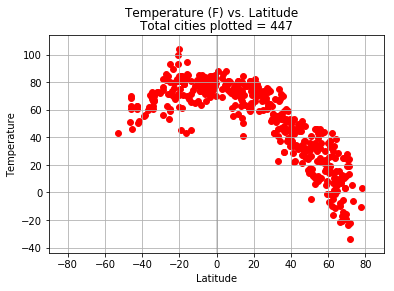

In [22]:
print('----------1. Temperature vs. Latitude Scatterplot----------')
# Temperature vs Latitude 
city_coordinates_df2.plot(kind="scatter",x="Latitude",y="Temperature",s=35, marker = 'o', color = 'red', grid=True)
plt.suptitle('Temperature (F) vs. Latitude')
plt.title('Total cities plotted = %s'%(final_df_sz))
plt.ylim(city_coordinates_df2['Temperature'].min() - 10, 10 + city_coordinates_df2['Temperature'].max())
plt.xlim(-90, 90)
plt.axvline(0, color='gray',alpha=0.4)
plt.savefig("Temperature vs. Latitude.png")
plt.show()

----------2. Humidity vs. Latitude Scatterplot----------


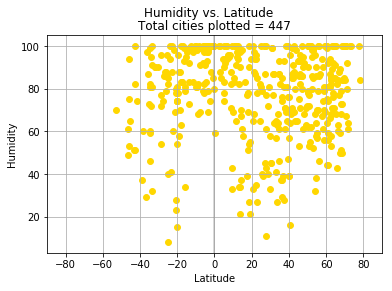

In [23]:
print('----------2. Humidity vs. Latitude Scatterplot----------')
# Temperature vs Latitude 
city_coordinates_df2.plot(kind="scatter",x="Latitude",y="Humidity",s=35, marker = 'o', color = 'gold', grid=True)
plt.suptitle('Humidity vs. Latitude')
plt.title('Total cities plotted = %s'%(final_df_sz))
plt.ylim(city_coordinates_df2['Humidity'].min() - 5, 5 + city_coordinates_df2['Humidity'].max())
plt.xlim(-90, 90)
plt.axvline(0, color='gray',alpha=0.4)
plt.savefig("Humidity vs. Latitude.png")
plt.show()

----------3. Cloudiness vs. Latitude Scatterplot----------


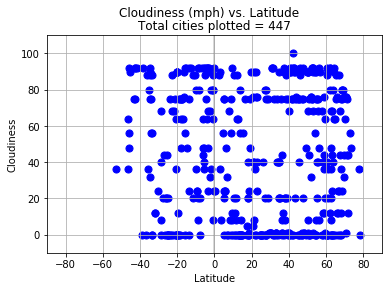

In [24]:
print('----------3. Cloudiness vs. Latitude Scatterplot----------')
# Temperature vs Latitude 
city_coordinates_df2.plot(kind="scatter",x="Latitude",y="Cloudiness",s=50, marker = 'o', color = 'blue', grid=True)
plt.suptitle('Cloudiness (mph) vs. Latitude')
plt.title('Total cities plotted = %s'%(final_df_sz))
plt.ylim(city_coordinates_df2['Cloudiness'].min() - 10, 10 + city_coordinates_df2['Cloudiness'].max())
plt.xlim(-90, 90)
plt.axvline(0, color='gray',alpha=0.4)
plt.savefig("Cloudiness vs. Latitude.png")
plt.show()

----------4. Wind Speed vs. Latitude Scatterplot----------


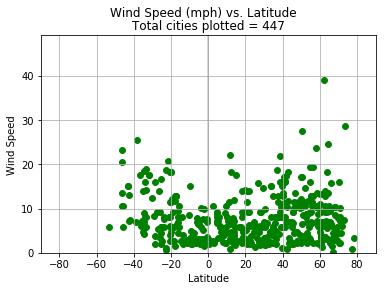

In [25]:
print('----------4. Wind Speed vs. Latitude Scatterplot----------')
# Temperature vs Latitude 
city_coordinates_df2.plot(kind="scatter",x="Latitude",y="Wind Speed",s=35, marker = 'o', color = 'green', grid=True)
plt.suptitle('Wind Speed (mph) vs. Latitude')
plt.title('Total cities plotted = %s'%(final_df_sz))
plt.ylim(0, 10 + city_coordinates_df2['Wind Speed'].max())
plt.xlim(-90, 90)
plt.axvline(0, color='gray',alpha=0.4)
plt.savefig("Wind Speed vs. Latitude.png")
plt.show()

In [26]:
print('Observable Trends')
print('1.The temperature increases as coordinates get closer to the equator. The cities around the equator have the highest temperatures')
max_wind = city_coordinates_df2.loc[city_coordinates_df2['Wind Speed'] == city_coordinates_df2['Wind Speed'].max()]
max_wind['City']
max_wind['Country Code']
print('2.The wind speed for most of the cities is under 10 mph. The median is %smph. There is a possible outlier with a wind speed of %smph in %s'%(city_coordinates_df2['Wind Speed'].median(),city_coordinates_df2['Wind Speed'].max(),'Pahrump in the US'))
print('3. The clouds seem pretty disperse, whithout a visible correlation with the latitude.')


Observable Trends
1.The temperature increases as coordinates get closer to the equator. The cities around the equator have the highest temperatures
2.The wind speed for most of the cities is under 10 mph. The median is 6.22mph. There is a possible outlier with a wind speed of 39.15mph in Pahrump in the US
3. The clouds seem pretty disperse, whithout a visible correlation with the latitude.
